In [ ]:
# Google Colab에서 Kaggle API를 사용하기 위한 라이브러리 설치
!pip install kaggle

# Kaggle API 토큰 업로드
from google.colab import files
files.upload()

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
# Kaggle API 토큰을 사용자 디렉토리로 복사하고 권한 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Kaggle에서 데이터셋 다운로드
!kaggle datasets download -d hetulmehta/website-classification

 50% 1.00M/2.00M [00:00<00:00, 2.12MB/s]
100% 2.00M/2.00M [00:00<00:00, 3.60MB/s]


In [ ]:
!ls

kaggle.json  sample_data  website-classification.zip


In [ ]:
# 다운로드한 데이터셋 압축 해제
!unzip website-classification.zip

Archive:  website-classification.zip
  inflating: website_classification.csv  


In [ ]:
import pandas as pd

# CSV 파일에서 데이터 불러오기
wc_data = pd.read_csv('website_classification.csv')

# 'Streaming Services'와 다른 카테고리에 대한 'Outlook' 열 생성
wc_data.loc[wc_data['Category'] == 'Streaming Services', 'Outlook'] = 1
wc_data.loc[wc_data['Category'] != 'Streaming Services', 'Outlook'] = 0

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# 훈련 및 테스트 데이터 분할
X = np.array(pd.DataFrame(wc_data, columns = ['cleaned_website_text']))
y = np.array(pd.DataFrame(wc_data, columns = ['Outlook']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.flatten())
X_test_tfidf = tfidf_vectorizer.transform(X_test.flatten())

In [ ]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 초기화 및 훈련
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# 예측
y_pred = logreg_model.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# 결과 출력
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)
print("\nConfusion Matrix:\n", confusion_matrix_result)

Accuracy: 0.9645390070921985

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       264
         1.0       1.00      0.44      0.62        18

    accuracy                           0.96       282
   macro avg       0.98      0.72      0.80       282
weighted avg       0.97      0.96      0.96       282


Confusion Matrix:
 [[264   0]
 [ 10   8]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


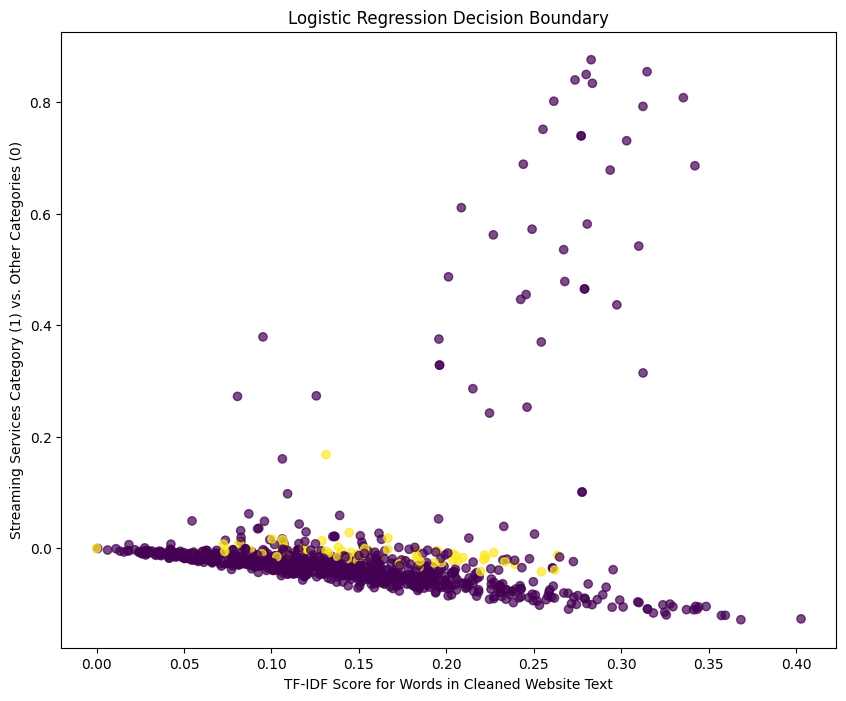

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# 시각화를 위한 차원 축소
svd = TruncatedSVD(n_components=2)
X_train_tfidf_svd = svd.fit_transform(X_train_tfidf)

# 로지스틱 회귀 계수를 2차원으로 축소
logreg_model_2d = LogisticRegression()
logreg_model_2d.fit(X_train_tfidf_svd, y_train)

# 데이터 포인트 플로팅
plt.figure(figsize=(10, 8))
plt.scatter(X_train_tfidf_svd[:, 0], X_train_tfidf_svd[:, 1], c=y_train, cmap='viridis', alpha=0.7)

# 의사결정 경계 플로팅
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 모델 평가를 위한 그리드 생성
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = logreg_model_2d.decision_function(np.c_[xx.ravel(), yy.ravel()])

# 의사결정 경계 및 여백 플로팅
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')

# 플롯 레이블링
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('TF-IDF Score for Words in Cleaned Website Text')
plt.ylabel('Streaming Services Category (1) vs. Other Categories (0)')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


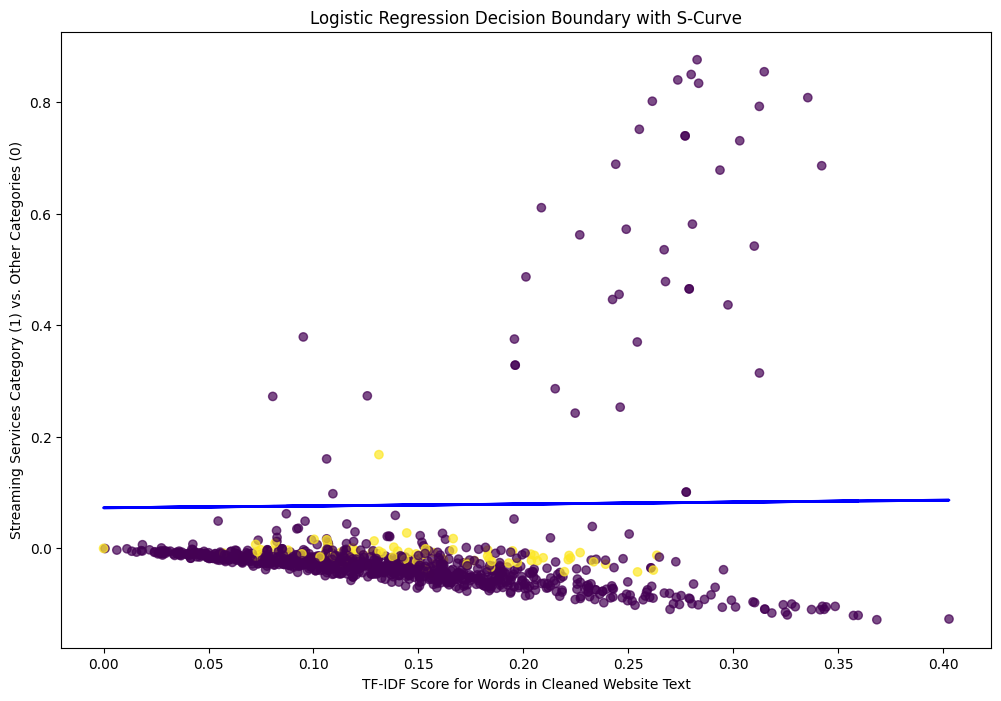

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# 시각화를 위한 차원 축소
svd = TruncatedSVD(n_components=2)
X_train_tfidf_svd = svd.fit_transform(X_train_tfidf)

# 로지스틱 회귀 계수를 2차원으로 축소
logreg_model_2d = LogisticRegression()
logreg_model_2d.fit(X_train_tfidf_svd, y_train)

# 데이터 포인트 플로팅
plt.figure(figsize=(12, 8))
plt.scatter(X_train_tfidf_svd[:, 0], X_train_tfidf_svd[:, 1], c=y_train, cmap='viridis', alpha=0.7)

# 의사결정 경계 플로팅
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 모델 평가를 위한 그리드 생성
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = logreg_model_2d.decision_function(np.c_[xx.ravel(), yy.ravel()])

# 의사결정 경계 및 여백 플로팅
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')

# S-커브 (시그모이드 함수) 플로팅
sigmoid_function = lambda x: 1 / (1 + np.exp(-x))
plt.plot(X_train_tfidf_svd[:, 0], sigmoid_function(logreg_model_2d.coef_[0][0] * X_train_tfidf_svd[:, 0] + logreg_model_2d.intercept_[0]), color='blue', linewidth=2)

# 플롯 레이블링
plt.title('Logistic Regression Decision Boundary with S-Curve')
plt.xlabel('TF-IDF Score for Words in Cleaned Website Text')
plt.ylabel('Streaming Services Category (1) vs. Other Categories (0)')

plt.show()